# Gender Bias Test Protocol

### Creating the Dataset
You should first execute the notebook that performs the automated labeling of the Simmons Institute playlist (under the name Simmons.ipynb) and import the corresponding JSON file into the current notebook. Once this is done, you need to transform the said JSON into a dataset. Here, I suggest converting it into CSV format (comma-separated) and then proceed with normal work. It should be noted, therefore, that the following cell is to be executed only once, and be careful to change the name if you are working with different names. You also need to create an empty CSV file and import it into the current notebook with the name 'database_SIMMONS.csv'.

In [3]:
import json
import csv

def json_to_csv_with_duration(json_file_path, csv_file_path):
    # Load the JSON data
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Prepare data for CSV
    csv_data = [['ID', 'Gender', 'Total Talk Duration', 'Total Interruption Duration', 'Number of Interruptions']]
    for i, item in enumerate(data, start=1):
        total_interruption_duration = sum([interruption[1] - interruption[0] for interruption in item['interruptions']])
        total_talk_duration = item['end'] - item['start']
        row = [i, item['gender'], total_talk_duration, total_interruption_duration, item['num_interruptions']]
        csv_data.append(row)

    # Write data to CSV
    with open(csv_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(csv_data)
json_file_path = 'database_SIMMONS.json'
csv_file_path = 'database_SIMMONS.csv'
json_to_csv_with_duration(json_file_path, csv_file_path)        


In [4]:
# Importing the relevant libraries/functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Tests 
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [6]:
df=pd.read_csv('database_SIMMONS.csv', sep=',' ,index_col='ID' )
df.head(10) 

,Gender,Total Talk Duration,Total Interruption Duration,Number of Interruptions
ID,,,,
1,M,3591,107,17
2,M,3194,338,42
3,F,3480,197,35
4,M,1785,0,0
5,U,2496,39,7
6,U,794,68,13
7,F,1767,41,8
8,F,2639,75,22
9,F,1577,23,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       84 non-null     object
 1   Total Talk Duration          84 non-null     int64 
 2   Total Interruption Duration  84 non-null     int64 
 3   Number of Interruptions      84 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [8]:
df = df[df['Gender'] != 'U'] # Since the automated labeling could not identify several genders
#(including those of the main speaker) and left them as 'U', we remove them from the dataset.

In [10]:
df.head(10)

,Gender,Total Talk Duration,Total Interruption Duration,Number of Interruptions
ID,,,,
1,M,3591,107,17
2,M,3194,338,42
3,F,3480,197,35
4,M,1785,0,0
7,F,1767,41,8
8,F,2639,75,22
9,F,1577,23,3
10,M,1762,39,7
13,M,1735,34,11


### Adding relevant variables

In [11]:
df['Interruption frequency'] = df['Total Interruption Duration'] / df['Total Talk Duration'] # the total interruption duration
# divided by the total talk duration, this is actually the Percentage of interruptions (If the name is misleading)

In [12]:
df['Interruption frequency %']=df['Interruption frequency']*100

In [16]:
df['AVG interruption']=df['Total Interruption Duration'] / df['Number of Interruptions'] # The average duration of an interruption"
df['AVG interruption'] = df['AVG interruption'].fillna(0) # for the null values 

In [17]:
df.head(10)

,Gender,Total Talk Duration,Total Interruption Duration,Number of Interruptions,Interruption frequency,Interruption frequency %,AVG interruption
ID,,,,,,,
1,M,3591,107,17,0.029797,2.979671,6.294118
2,M,3194,338,42,0.105823,10.582342,8.047619
3,F,3480,197,35,0.056609,5.660920,5.628571
4,M,1785,0,0,0.000000,0.000000,0.000000
7,F,1767,41,8,0.023203,2.320317,5.125000
8,F,2639,75,22,0.028420,2.841986,3.409091
9,F,1577,23,3,0.014585,1.458465,7.666667
10,M,1762,39,7,0.022134,2.213394,5.571429
13,M,1735,34,11,0.019597,1.959654,3.090909


### Relevant Plots

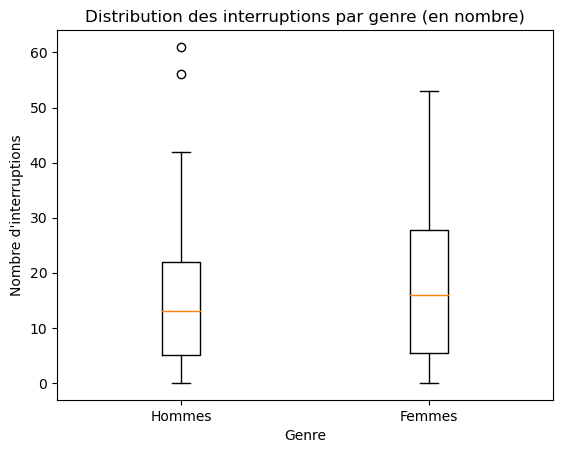

In [21]:
# Boxplots of distributions
Male = df[df['Gender'] == 'M']['Number of Interruptions']
Female = df[df['Gender'] == 'F']['Number of Interruptions']
plt.boxplot([Male, Female], labels=['Hommes', 'Femmes'])

plt.xlabel('Genre')
plt.ylabel('Nombre d\'interruptions')
plt.title('Distribution des interruptions par genre (en nombre)')

plt.show()

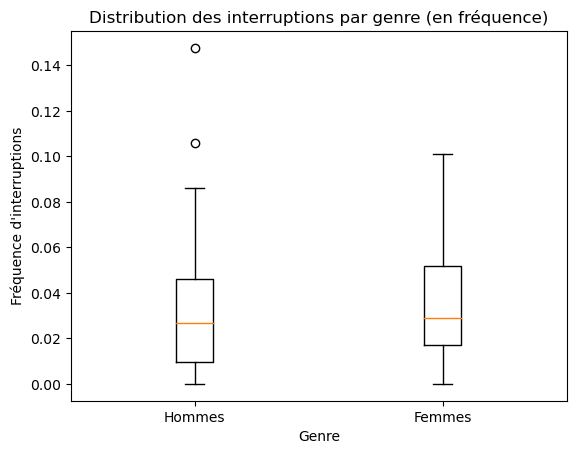

In [22]:
Male_frequency = df[df['Gender'] == 'M']['Interruption frequency']
Female_frequency = df[df['Gender'] == 'F']['Interruption frequency']
plt.boxplot([Male_frequency, Female_frequency], labels=['Hommes', 'Femmes'])

plt.xlabel('Genre')
plt.ylabel('Fréquence d\'interruptions')
plt.title('Distribution des interruptions par genre (en fréquence)')

plt.show()

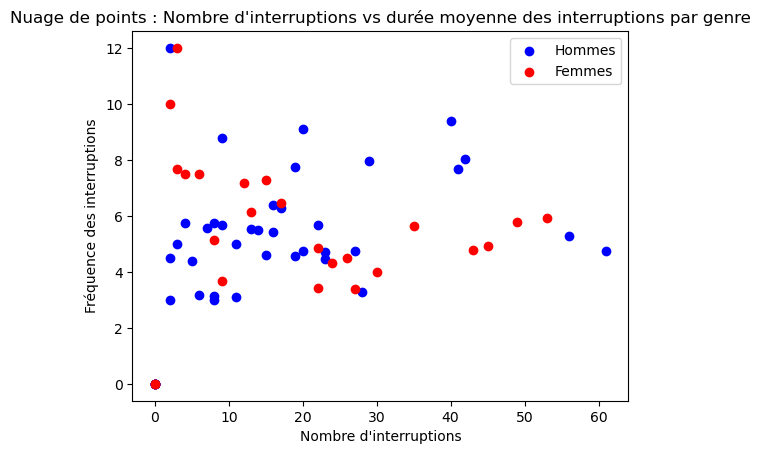

In [24]:
# Here, we plot the average duration of an interruption as a function of the number of interruptions. 
#The top-right quadrant signifies both a high number of interruptions and a long duration for each interruption.
#Finding women in this quadrant would be a strong indicator of bias.
hommes = df[df['Gender'] == 'M']
femmes = df[df['Gender'] == 'F']

plt.scatter(hommes['Number of Interruptions'], hommes['AVG interruption'], color='blue', label='Hommes')
plt.scatter(femmes['Number of Interruptions'], femmes['AVG interruption'], color='red', label='Femmes')

plt.xlabel('Nombre d\'interruptions')
plt.ylabel('Fréquence des interruptions')
plt.title('Nuage de points : Nombre d\'interruptions vs durée moyenne des interruptions par genre')

plt.legend()
plt.show()

Looking at the boxplots, it is evident that the median of the data for females is higher than that for males. In other words, the median values of the observations for females are generally larger than those for males. This could indicate significant differences in the distribution of the data between the two populations, particularly regarding the central tendency of the observations.
The second plot doesn't allow us to conclude much. 

### Test de MannWhitney 

In [27]:
# Test avec le nombre d'interruptiosn 
statistic, p_value = mannwhitneyu(Male, Female)

In [26]:
print("Statistique de test de Mann-Whitney :", statistic)
print("p-Valeur associée :", p_value)

Statistique de test de Mann-Whitney : 426.0
p-Valeur associée : 0.37275856444269795


In [29]:
# Test avec la fréquence d'interruptions 
statistic_frequency, p_value_frequency = mannwhitneyu(Male_frequency, Female_frequency)

In [30]:
print("Statistique de test de Mann-Whitney :", statistic_frequency)
print("p-Valeur associée :", p_value_frequency)

Statistique de test de Mann-Whitney : 418.0
p-Valeur associée : 0.31745052451001465


### Test du Chi-2

For this test, we need a contingency table that cross-tabulates the gender of the main speaker with the interruption frequency, but in categories. Defining category intervals when conducting a statistical study about which we have no prior knowledge is arbitrary; therefore, we opt for categorization based on quartiles of the distribution. However, this approach may be somewhat flawed, especially if the data points are very close to each other.

In [32]:
 df['Var_categorielles']=pd.qcut(df['Interruption frequency'], 4, labels=['1','2','3','4']) # Defining Category intervals 

In [35]:
# Test avec la fréquence d'interruptions
contingency_table = pd.crosstab(df['Gender'], df['Var_categorielles'])

print(contingency_table)

Var_categorielles   1  2  3  4
Gender                        
F                   3  7  7  7
M                  14  9  9  9


In [36]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Valeur de chi carré :", chi2)
print("p valeur associée :", p_value)
print("Degrés de liberté :", dof)

Valeur de chi carré : 3.6727156563845047
p valeur associée : 0.2990426088845146
Degrés de liberté : 3


In [37]:
df['Var_categorielles_nombre']=pd.qcut(df['Number of Interruptions'], 4, labels=['1_n','2_n','3_n','4_n'])

In [38]:
# Test avec le nombre d'interruptions 
contingency_table_freq = pd.crosstab(df['Gender'], df['Var_categorielles_nombre'])

print(contingency_table_freq)

Var_categorielles_nombre  1_n  2_n  3_n  4_n
Gender                                      
F                           6    5    5    8
M                          11   11   11    8


In [39]:
chi2_freq, p_value_freq, dof_freq, expected_freq = chi2_contingency(contingency_table_freq)
print("Valeur de chi carré :", chi2_freq)
print("p valeur associée :", p_value_freq)
print("Degrés de liberté :", dof_freq)

Valeur de chi carré : 1.6363656743185078
p valeur associée : 0.6511725437718963
Degrés de liberté : 3


Rappels : La valeur de chi carré mesure l'écart entre les fréquences observées et les fréquences attendues sous l'hypothèse nulle. Plus la valeur de chi carré est élevée, plus il est improbable que les différences observées soient dues au hasard.

La p-valeur mesure la probabilité d'observer des résultats aussi extrêmes que ceux observés si l'hypothèse nulle (pas de différence entre les groupes) est vraie. Si la p-valeur est inférieure à un seuil prédéfini (généralement 0.05), on rejette l'hypothèse nulle en faveur de l'hypothèse alternative (il y a une différence significative entre les groupes).

On conclut en raison des p-valeurs élevées observées qu'il n'y a pas de différence significative entre les groupes en termes de fréquence d'interruption pour les deux tests. Cela signifie que, selon ces tests, il n'y a pas de preuve statistique d'un biais de genre dans les interruptions lors des conférences, en tenant compte des considérations et des tests effectués.

### Conclusion 
L'échnatillon étant très petit (encore trop petit après avoir enlevé les Undefined), on ne peut donc pas encore parler d'un vrai test statistique. Quoique, le squelette de ce qu'il faut faire est là il faudra juste l'appliquer une fois on a plus de données. Dans une première approche on s'est pas intéressée au genre de la personne qui interrompt (aussi l'on avait pas cette info sur ce dataset), notre prochaine étape serait de définir le test pour prendre cela en considération